<a href="https://colab.research.google.com/github/shahjalal2313/ML-Basics/blob/main/Bias_Variance_Trade_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
#dataset
np.random.seed(42)
X = np.linspace(0, 10, 30).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, X.shape[0])

In [ ]:
# Different polynomial degrees
degrees = [1, 4, 8]

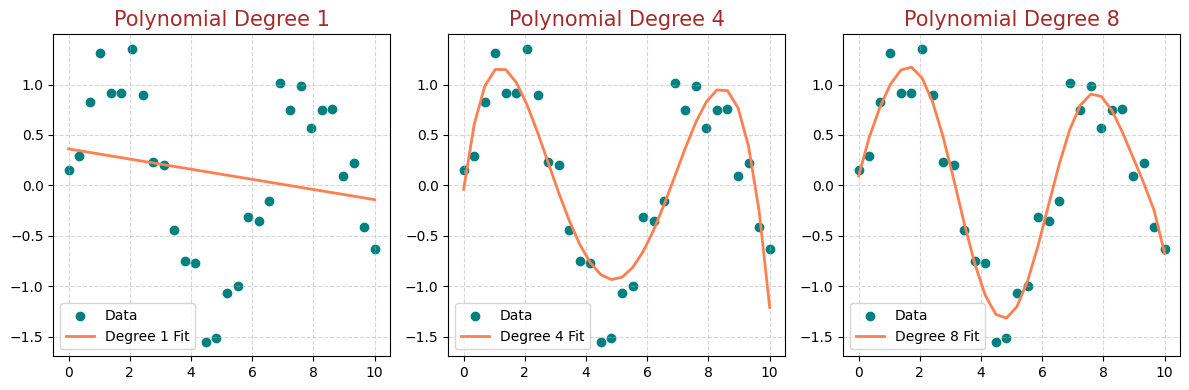

In [6]:
plt.figure(figsize=(12, 4))

for i, d in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X, y, color='teal', label="Data")
    plt.plot(X, y_pred, color='coral',linewidth=2, label=f"Degree {d} Fit")
    plt.legend()
    plt.title(f"Polynomial Degree {d}",fontsize=15,color='brown')
    plt.grid(True,linestyle='--',alpha=0.5)

plt.tight_layout()
#plt.savefig('polynomialFeatures.png')
plt.show()

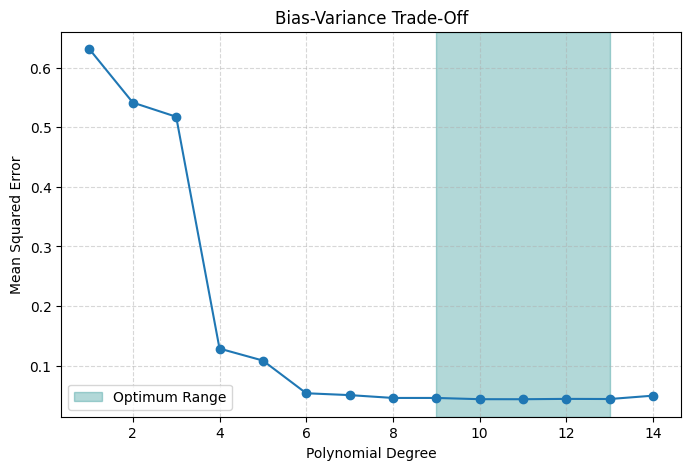

In [15]:

degrees = range(1, 15)
errors = []

for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X, y)

    y_pred = model.predict(X)
    error = np.mean((y - y_pred) ** 2)  # Mean Squared Error
    errors.append(error)

#minimum error
min_error_index = np.argmin(errors)
optimal_degree = degrees[min_error_index]

#optimum range
optimum_range = range(optimal_degree - 2, optimal_degree + 3)

plt.figure(figsize=(8, 5))
plt.plot(degrees, errors, marker='o', linestyle='-')
plt.grid(True,linestyle ="--",alpha=0.5)
plt.axvspan(optimum_range.start, optimum_range.stop -1 , color='teal', alpha=0.3, label='Optimum Range')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Trade-Off")
plt.legend()
plt.savefig('bias-variance.png')
plt.show()

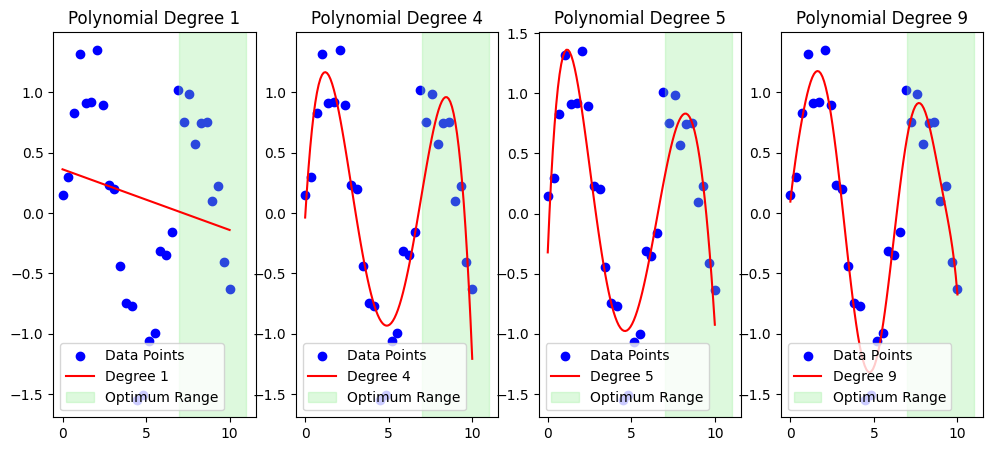

In [11]:
# Different polynomial degrees
degrees = [1, 4, 5, 9]

# Calculate errors
errors = []
for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    error = np.mean((y - y_pred) ** 2)  # Mean Squared Error
    errors.append(error)


plt.figure(figsize=(12, 5))

for i, d in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X, y)

    x_range = np.linspace(0, 10, 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    #index of the minimum error
    min_error_index = np.argmin(errors)
    optimal_degree = degrees[min_error_index]

    #optimum range
    optimum_range = range(optimal_degree - 2, optimal_degree + 3)

    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(x_range, y_pred, color='red', label=f'Degree {d}')
    #annotation for the optimum range
    plt.axvspan(optimum_range.start, optimum_range.stop -1 , color='lightgreen', alpha=0.3, label='Optimum Range')
    plt.title(f'Polynomial Degree {d}')
    plt.legend()

plt.show()